### 워드클라우드 - 어버이날 선물

In [8]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import re, nltk
from konlpy.tag import Okt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


- 한글 텍스트 전처리

In [15]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [16]:
okt = Okt()
tokens = okt.nouns(text)     # 문장에서 명사 추출
tokens[:10]

['어버이날', '선물', '추천', '탄생석', '골드', '카네이션', '추천', '카네이션', '자체', '전체']

In [19]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:    # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

- 불용어 정리

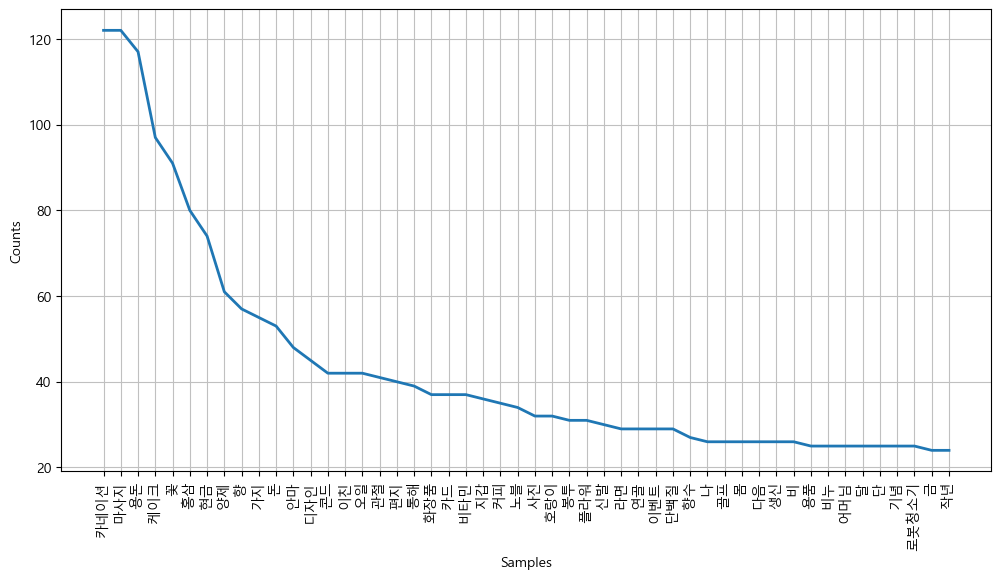

In [29]:
gift = nltk.Text(new_tokens, name='어버이날선물')
plt.figure(figsize=(12,6))
gift.plot(50);



In [28]:
stoptext = """
    선물 추천 어버이날 부모님 것 수 제품 건강 제 이 저 식품 가격 도움 
    요 스 사용 참고 때 활동 구매 파트너 수수료 세트 등 고민 기 요즘 박스
    상품 마음 제공 생각 분 거 정액 한번 이미지 존재 링크 아래 기능
    위 정말 지금 일환 더 포스팅 답변 부담 선택 관리 하나 인기 가장 주문
    채택 브랜드 준비 의미 방향 배송 어머니 저희 날 건 발 제작 질문 나이 이번
    정도 아버지 포장 쿠팡 시간 일 정보 도 꼭 중 할인 운동 평소 후기 보시
    자 걸 사 직접 집 때문 좀 엄마 피 번 전 글 제일 다른
    관련 최고 드릴 석고 해 조금 구성 보충 효과 구 판매 고려 그 경우 종류
    우리 매일 가성 용 섭취 개 아빠 검색 사람 바로 더욱 안 조절 여러 아버님
    가요 확인 성분 당뇨 어르신 생신 용품 나 기념 작년
"""

stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['탄생석', '골드', '카네이션', '카네이션', '자체', '전체', '도금', '완전', '금', '카네이션']

- 워드 클라우드 그리기

In [30]:
data = gift.vocab().most_common(5)
data

[('카네이션', 122), ('마사지', 122), ('용돈', 117), ('케이크', 97), ('꽃', 91)]

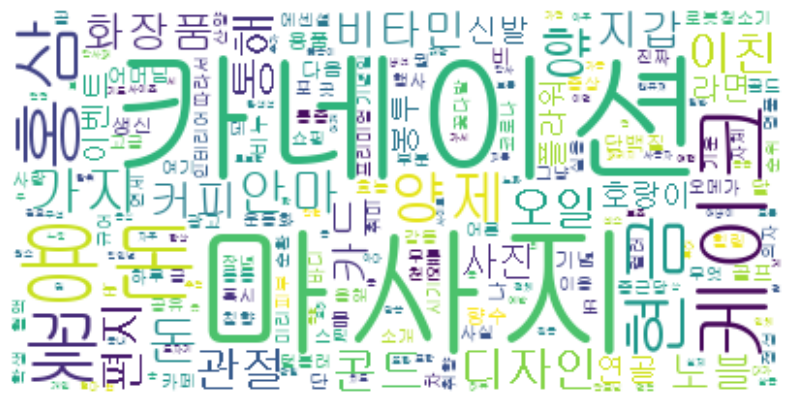

In [31]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

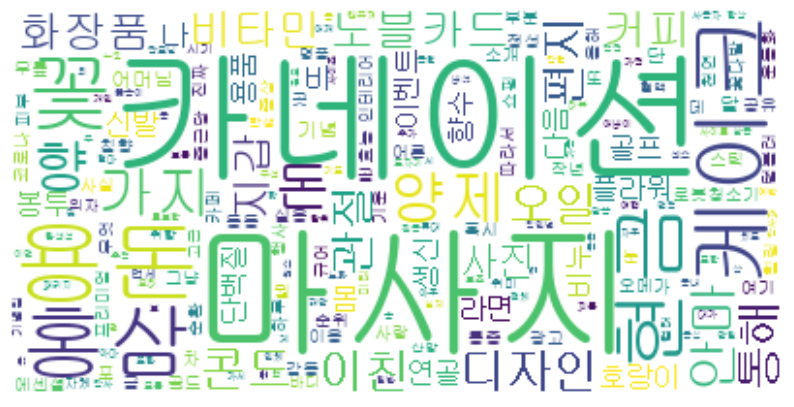

In [35]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF',
    relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시

In [36]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)


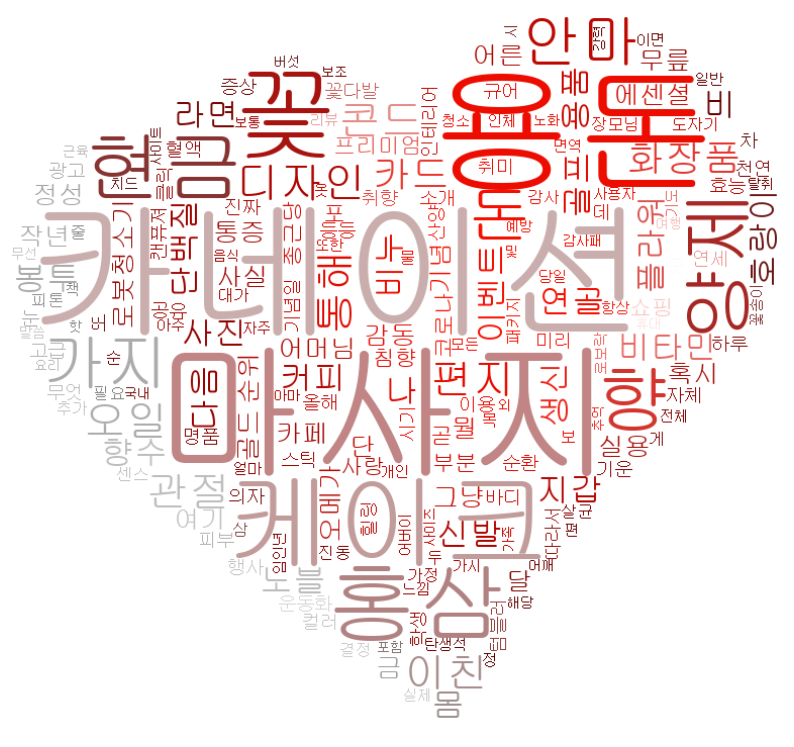

In [39]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF',
    relative_scaling=0.2,
    mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
# plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()